**TASK 1- TITANIC SURVIVAL PREDICTION**
**BY Suthagar M**

**IMPORTING LIBRARIES**

In [34]:
import numpy as np
import matplotlib.pyplot as mp
import pandas as pd
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

**IMPORTING DATASET**

In [35]:
df=pd.read_csv("D:/MITUL/Titanic-Dataset.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [36]:
df.shape

(891, 12)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [38]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**CLEANING DATASET BY FILLING THE EMPTY CELL**

In [39]:
x=df['Age'].mean()
x
df.fillna({'Age': x}, inplace=True)

In [40]:
y=df['Embarked'].mode()[0]
y
df.fillna({'Embarked':y},inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [41]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

**CONVERTING CATEGORICAL DATA OF SEX COLUMN INTO NUMERICAL**

In [42]:
df.replace({'Sex':{'male':0,'female':1}},inplace=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


**VISUALIZING THE COUNT OF GENDER WRT SURVIVAL USING BAR CHART**

<Axes: xlabel='Sex', ylabel='count'>

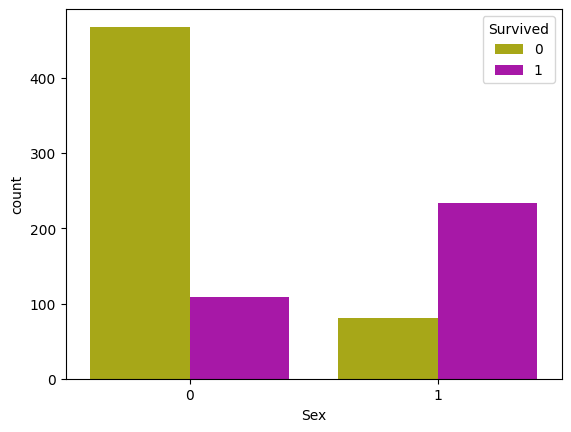

In [43]:
c=['y','m']
sb.countplot(x='Sex',hue='Survived',data=df,palette=c)
# on x axis 0 is male 1 is female

It conclude that female survived more then the male.

**COUNTING THE SUB CATEGORIES IN THE COLUMNS SEX, SURVIVED, PCLASS, EMBARKED.**

In [44]:
a=df['Sex'].value_counts()
a

Sex
0    577
1    314
Name: count, dtype: int64

In [45]:
b=df['Survived'].value_counts()
b

Survived
0    549
1    342
Name: count, dtype: int64

In [46]:
c=df['Pclass'].value_counts()
c

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [47]:
x=df.groupby('Pclass')
x

In [48]:
d=df['Embarked'].value_counts()
d

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

**VISUALIZING PASSENGER COUNT AND THEIR SURVIVAL COUNT BY CLASS USING STACK COLUMN CHART**

In [49]:
x=df.groupby(['Pclass','Survived']).size().reset_index(name='Counts')
x
# this give us sub categorical data for passengers survived or not for different Pclass

,Pclass,Survived,Counts
0,1,0,80
1,1,1,136
2,2,0,97
3,2,1,87
4,3,0,372
5,3,1,119


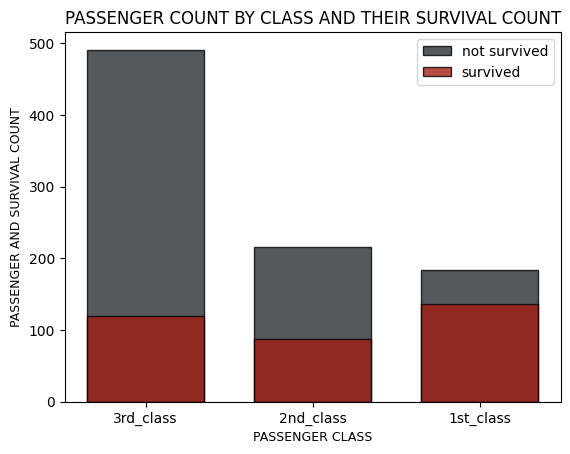

In [50]:
x=['3rd_class','2nd_class','1st_class']
y=[119,87,136]
mp.xlabel('PASSENGER CLASS',fontsize=9,color='black')
mp.ylabel('PASSENGER AND SURVIVAL COUNT',fontsize=9,color='black')
mp.title('PASSENGER COUNT BY CLASS AND THEIR SURVIVAL COUNT',fontsize=12)
mp.bar(x,c,color=['#292F36'],width=0.7,edgecolor='black',alpha=0.8)
mp.bar(x,y,color=['#A41f13'],width=0.7,edgecolor='black',alpha=0.8)
mp.legend(['not survived','survived'])
# c is the passenger count by class
# for survival 1 stand for survived and 0 stand for not survived

From this we conclude that in first class passengers having good facilities, due to which their survival count is more.

**VISUALIZING THE SEX COLUMN PIE CHART**

Text(0.5, 1.0, 'GENDER BY PASSENGER COUNT')

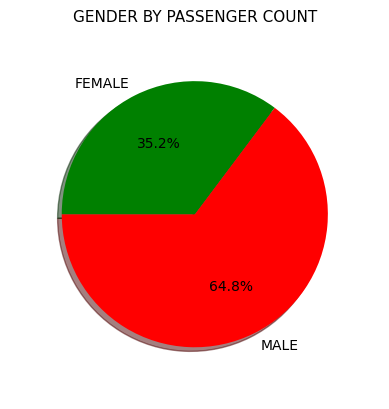

In [51]:
# a is the sex value count
mp.pie(a,labels=['MALE','FEMALE'],colors=['r','g'],autopct='%0.1f%%',shadow=True,radius=0.9,startangle=180)
mp.title('GENDER BY PASSENGER COUNT',fontsize=11)

Male passenger are more then female one.

**VIZUALIZING AGE COUNTING USING HISTOGRAM**

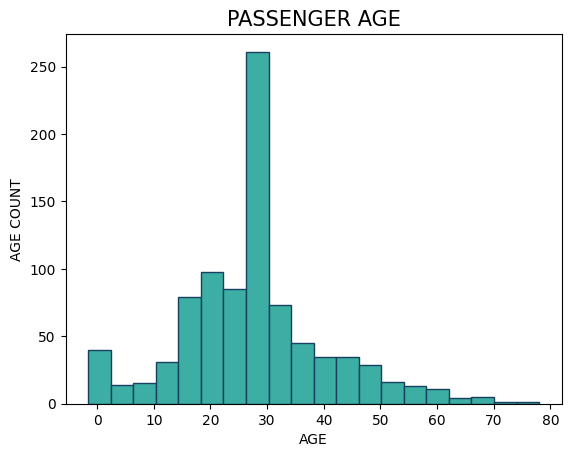

In [52]:
mp.hist (df['Age'], color="#3CAEA3",bins=20, edgecolor="#173F5F", align="left")
mp.title("PASSENGER AGE",fontsize=15)
mp.xlabel("AGE")
mp.ylabel("AGE COUNT")
mp.show()

It conclude that most of the passengers are between the age 20-40

**VISUALIZING AGE WRT FARE USING SCATTER PLOT**

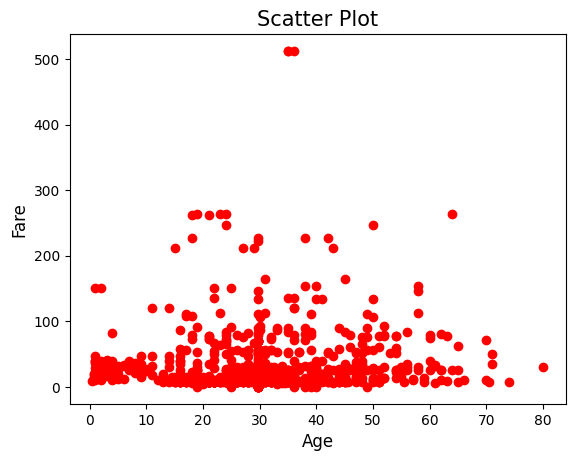

In [53]:
mp.scatter (df['Age'],df['Fare'],color='r')
mp.title("Scatter Plot", fontsize=15)
mp.xlabel("Age", fontsize=12)
mp.ylabel("Fare", fontsize=12)
mp.show()


There is a noticeable pattern where higher-paying passengers had better survival rates,with better access to resources during the evacuation.

In [54]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


**REMOVE UNWANTED COLUMNS**

In [55]:
df.drop(columns=['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True)

In [56]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,S
1,1,1,1,38.0,1,0,71.2833,C
2,1,3,1,26.0,0,0,7.9250,S
3,1,1,1,35.0,1,0,53.1000,S
4,0,3,0,35.0,0,0,8.0500,S


**FOR PREDICTION OF SURVIVAL WE NEED TO CONVERT CATEGORICAL DATA INTO NUMERICAL**

**CONVERTING CATEGORICAL DATA OF EMBARKED COLUMN INTO NUMERICAL**

In [57]:
df.replace({'Embarked':{'S':0,'C':1,'Q':2}},inplace=True)

In [58]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0


**SPLITTING THE DATA SET INTO TRAIN AND TEST, USING train_test_split**

In [59]:
X=df.drop(columns=['Survived'],axis=1)
y=df['Survived']

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=42)

# WE USED 20% OF THE DATA FOR TESTING

**LOGISTICREGRESSION HELP TO FIT THE DATA, AND CORRELATE THEM, THAT FURTHER HELP TO PRIDICT THE OUTCOME WITH CERTAIN ACCURACY.**

In [61]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression(max_iter=1000)

log.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [62]:
predict=log.predict(X_test)
predict

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1], dtype=int64)

In [63]:
y_test

709    1
439    0
840    0
720    1
39     1
      ..
433    0
773    0
25     1
84     1
10     1
Name: Survived, Length: 179, dtype: int64

In [64]:
log.score(X_test,y_test)
# 0.7988826815642458 is the accuracy of train_test data

0.7988826815642458

In [65]:
probabilities=log.predict_proba(X_test)
print(f"first 10 probabilities:\n{probabilities[:10]}")

# the right side of column indicate the probability of survival, for first three row the chance of survival is less, and the next four row pridict that, they can survive. 

first 10 probabilities:
[[0.90907513 0.09092487]
 [0.77255985 0.22744015]
 [0.86287546 0.13712454]
 [0.10750499 0.89249501]
 [0.29477179 0.70522821]
 [0.06470049 0.93529951]
 [0.28913541 0.71086459]
 [0.90821153 0.09178847]
 [0.20795083 0.79204917]
 [0.07314945 0.92685055]]
